# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

**Overview of Data:** The dataset collected represents 17 phone marketing campaigns between May 2008 and November 2010. The goal is 
to get them to subscribed to the long-term deposit application by marketing them with good intrest rates.The dataset
has success rate of 8 %.


### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [43]:
import pandas as pd
import numpy as np
# data viz
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# pre-processing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

# validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# modeling
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import time
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.metrics import RocCurveDisplay

import warnings
warnings.filterwarnings('ignore')

In [2]:
bank = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [4]:
#Check for the missing values
bank.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
# Check for duplicate
bank.duplicated().sum()

12

In [6]:
# Check for the total number of datasets and features
bank.shape

(41188, 21)

In [7]:
# Removing duplicates as dataset is huge
bank = bank.drop_duplicates()

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [8]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

**Business Objective** TThe business objective is to find a model that predicts if the client subscribes to the deposit by identifying the main characteristics that lead to the success. This type of model can help marketers to have a targeted campaign so that marketing resources can be better used towards the client more likely to subscribe.


### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [9]:
# As there are a lot of categorical columns. We can check the summary

for c in bank.select_dtypes(include=['object']).columns:
    print ("---- %s ---" % c)
    print (bank[c].value_counts())

---- job ---
job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64
---- marital ---
marital
married     24921
single      11564
divorced     4611
unknown        80
Name: count, dtype: int64
---- education ---
education
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: count, dtype: int64
---- default ---
default
no         32577
unknown     8596
yes            3
Name: count, dtype: int64
---- housing ---
housing
yes        21571
no         18615
unknown      990
Name: count, dtype: int64
---- loan ---
loan
no         33938
yes         6248
unknown      9

In [10]:
# Renaming the y column to target variable subscribed and converting the Binary column into Numerical
bank.rename({'y':'subscribed'}, axis = 1, inplace = True)
bank['subscribed'].replace({"no" : 0, "yes" : 1}, inplace = True)

In [11]:
# Ordinal Encoding of education column
oe = OrdinalEncoder(categories = [['unknown','illiterate', 'high.school', 'university.degree', 'basic.4y', 'basic.6y','basic.9y','professional.course']])
bank['education'] = oe.fit_transform(bank[['education']])           

In [12]:
# Converting the rest of the Categorical Column to a Numeric
# Using Mean Encoder
for column in bank.select_dtypes(include=['object']).columns:

    Mean_encoded_subject = bank.groupby([column])['subscribed'].mean().to_dict() 

    bank[column] =  bank[column].map(Mean_encoded_subject) 

<Axes: xlabel='subscribed'>

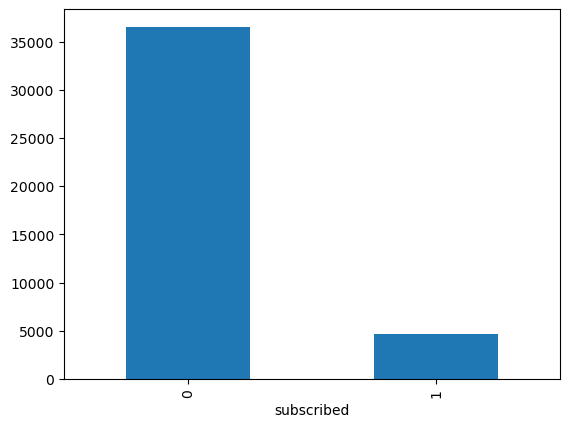

In [13]:
# Check the target variable. The data seems imbalanced
bank['subscribed'].value_counts().plot(kind = "bar")

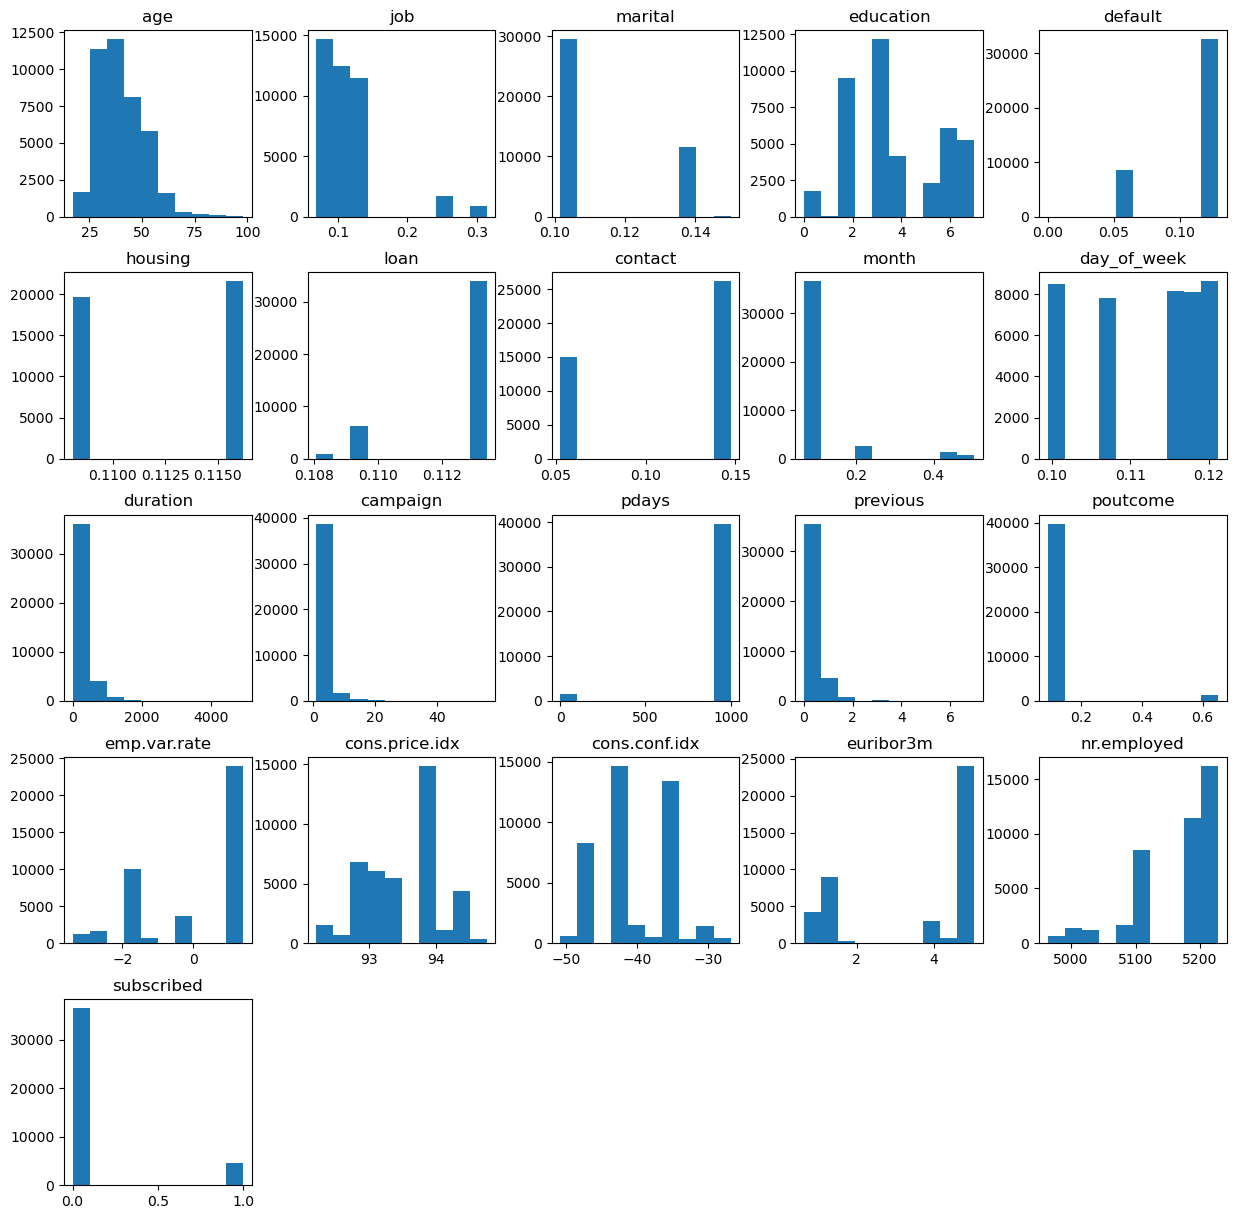

In [14]:
# check the distribution of all the features
plt.style.use('default') 
bank.hist(figsize = (15, 15), grid=False);

<Axes: >

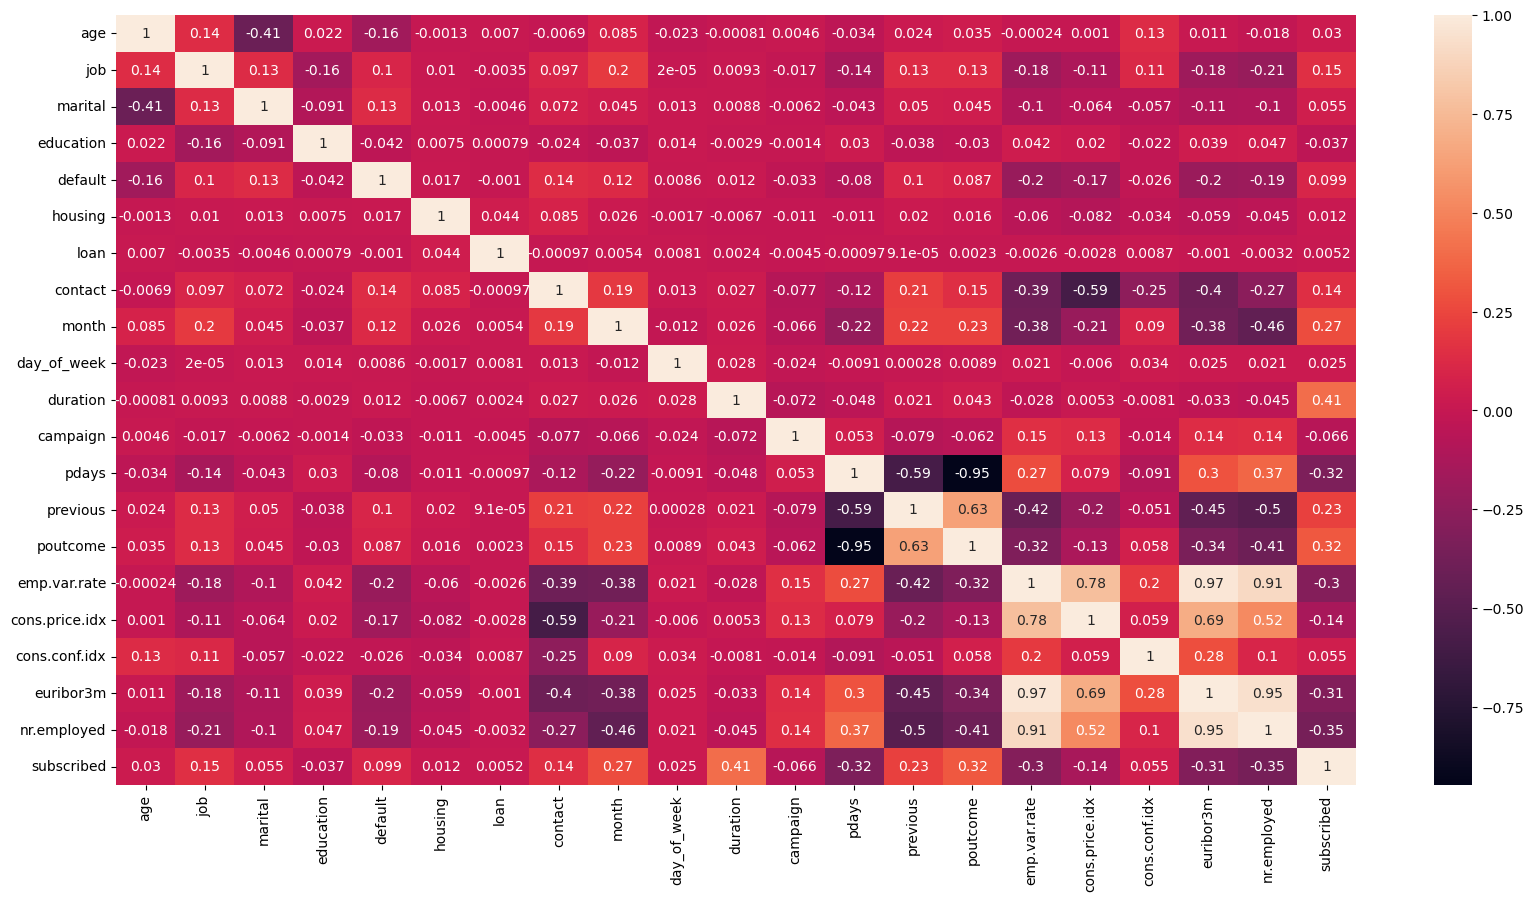

In [15]:
# Correlation of heat map against each feature
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(bank.corr(), annot = True)

In [16]:
# Dropping the duration field based on the below note on the Dataset
# Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). 
# Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known.
# Thus, this input should only be included for benchmark purposes and should be discarded if 
# the intention is to have a realistic predictive model.

df = bank.drop(['duration'], axis = 1)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,0.100000,0.101561,4.0,0.128803,0.108783,0.113413,0.052324,0.064357,0.099507,1,999,0,0.088324,1.1,93.994,-36.4,4.857,5191.0,0
1,57,0.081422,0.101561,2.0,0.051536,0.108783,0.113413,0.052324,0.064357,0.099507,1,999,0,0.088324,1.1,93.994,-36.4,4.857,5191.0,0
2,37,0.081422,0.101561,2.0,0.128803,0.116221,0.113413,0.052324,0.064357,0.099507,1,999,0,0.088324,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0.129667,0.101561,5.0,0.128803,0.108783,0.113413,0.052324,0.064357,0.099507,1,999,0,0.088324,1.1,93.994,-36.4,4.857,5191.0,0
4,56,0.081422,0.101561,2.0,0.128803,0.108783,0.109315,0.052324,0.064357,0.099507,1,999,0,0.088324,1.1,93.994,-36.4,4.857,5191.0,0


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [17]:
# Split the data to train and test
X = df.drop("subscribed", axis = 1)
y = df["subscribed"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [18]:
# Scaled the training data
scaler = StandardScaler()
# train data 
X_train_scaled = scaler.fit_transform(X_train)

# test data 
X_test_scaled = scaler.transform(X_test)

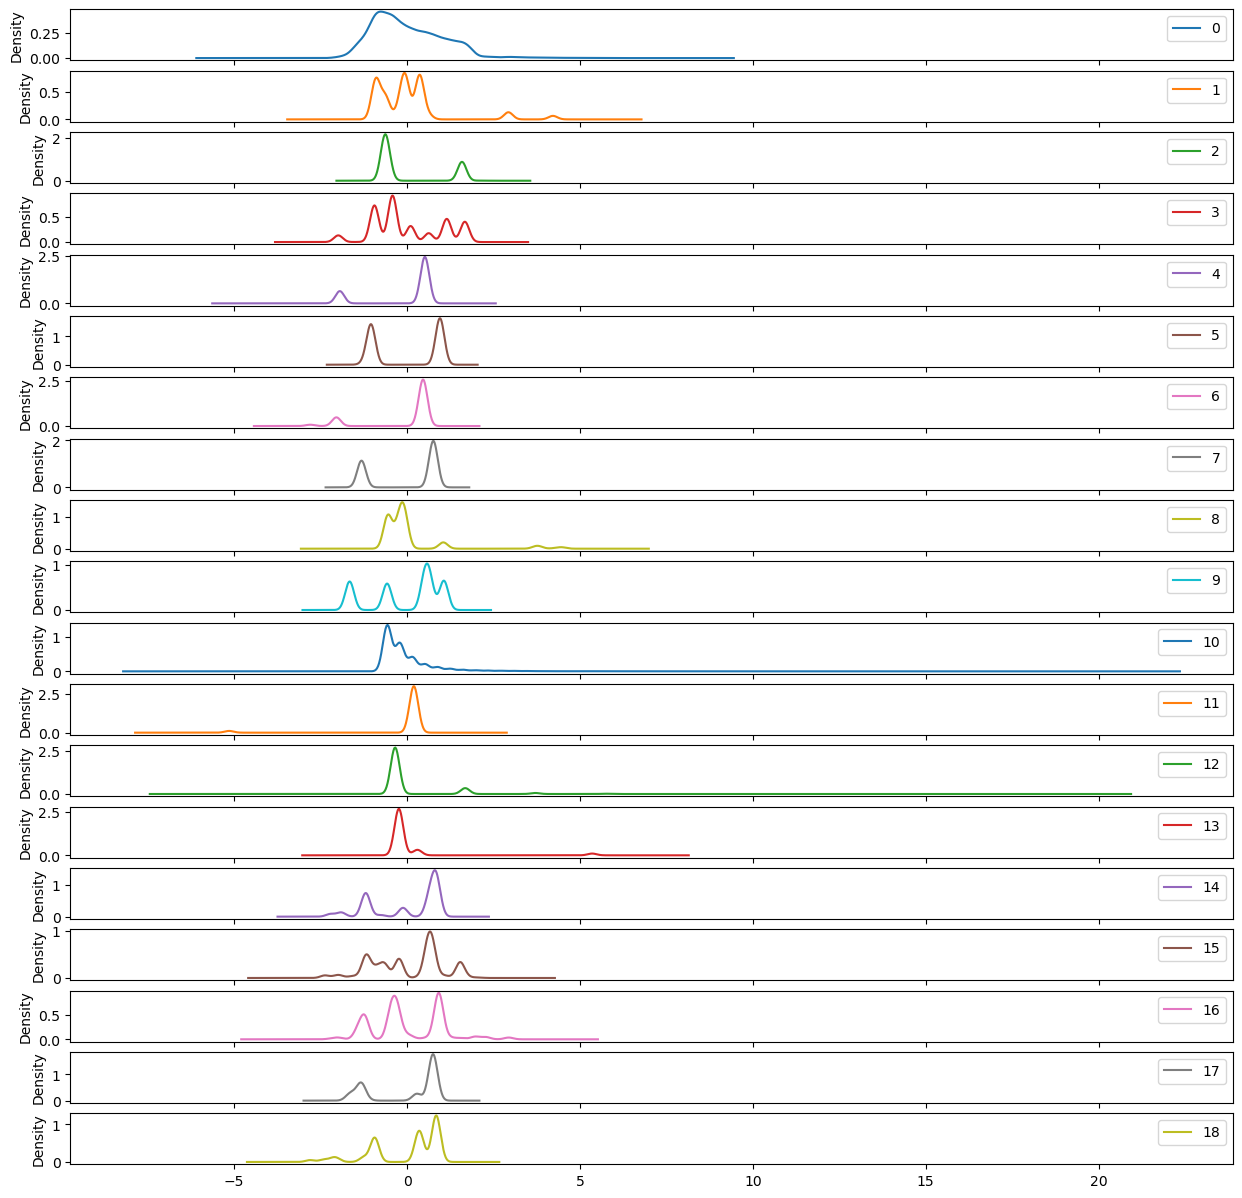

In [19]:
 pd.DataFrame(X_train_scaled).plot(kind = 'kde', figsize = (15, 15), subplots = True);

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [20]:
# Building the Baseline model using DummyClassifier
dummy = DummyClassifier(strategy= "prior")

In [21]:
# fit the model 
dummy.fit(X_train, y_train)

# accuracy score
print("The accuracy of the dummy classifier for train is {:.2%}".format(dummy.score(X_train, y_train)))
print("The accuracy of the dummy classifier for test is {:.2%}".format(dummy.score(X_test, y_test)))

The accuracy of the dummy classifier for train is 88.85%
The accuracy of the dummy classifier for test is 88.47%


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [22]:
#Logisitic Regression
lgr = LogisticRegression(random_state=42)
start = time.time()
lgr.fit(X_train_scaled, y_train)
stop = time.time()
lgr_train_time = stop - start

### Problem 9: Score the Model

What is the accuracy of your model?

In [23]:
lgr_train_score = lgr.score(X_train_scaled, y_train)
lgr_test_score = lgr.score(X_test_scaled, y_test)
print("The accuracy of the Logisitc Regression classifier for train is {:.2%}".format(lgr_train_score))
print("The accuracy of the Logisitc Regression for test is {:.2%}".format(lgr_test_score))

The accuracy of the Logisitc Regression classifier for train is 89.98%
The accuracy of the Logisitc Regression for test is 89.63%


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [24]:
result_df =[]
result_df.append(
        {
            'Model': 'Logistic Regression',
            'Train Time': lgr_train_time,
            'Train Accuracy':  lgr_train_score,
            'Test Accuracy': lgr_test_score
            
        })
pd.DataFrame(result_df)

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.100892,0.899768,0.8963


In [25]:
#KNN algorithm
knn =  KNeighborsClassifier()
start = time.time()
knn.fit(X_train_scaled, y_train)
stop = time.time()
knn_train_time = stop - start
knn_train_score = knn.score(X_train_scaled, y_train)
knn_test_score = knn.score(X_test_scaled, y_test)
result_df.append(
        {
            'Model': 'KNN algorithm',
            'Train Time': knn_train_time,
            'Train Accuracy':  knn_train_score,
            'Test Accuracy': knn_test_score
            
        })
pd.DataFrame(result_df)

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.100892,0.899768,0.896300
1,KNN algorithm,0.002434,0.913437,0.890472


In [26]:
#Decision Tree
dt =  DecisionTreeClassifier(random_state=42)
start = time.time()
dt.fit(X_train_scaled, y_train)
stop = time.time()
dt_train_time = stop - start
dt_train_score = dt.score(X_train_scaled, y_train)
dt_test_score = dt.score(X_test_scaled, y_test)
result_df.append(
        {
            'Model': 'Decision Tree',
            'Train Time': dt_train_time,
            'Train Accuracy':  dt_train_score,
            'Test Accuracy': dt_test_score
            
        })
pd.DataFrame(result_df)

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.100892,0.899768,0.896300
1,KNN algorithm,0.002434,0.913437,0.890472
2,Decision Tree,0.087708,0.995524,0.834858


In [27]:
# SVM Model

svm =  DecisionTreeClassifier(random_state=42)
start = time.time()
svm.fit(X_train_scaled, y_train)
stop = time.time()
svm_train_time = stop - start
svm_train_score = svm.score(X_train_scaled, y_train)
svm_test_score = svm.score(X_test_scaled, y_test)
result_df.append(
        {
            'Model': 'SVM',
            'Train Time': svm_train_time,
            'Train Accuracy':  svm_train_score,
            'Test Accuracy': svm_test_score
            
        })
pd.DataFrame(result_df)

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.100892,0.899768,0.896300
1,KNN algorithm,0.002434,0.913437,0.890472
2,Decision Tree,0.087708,0.995524,0.834858
3,SVM,0.085741,0.995524,0.834858


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

**More feature engineering and exploration**

<Axes: >

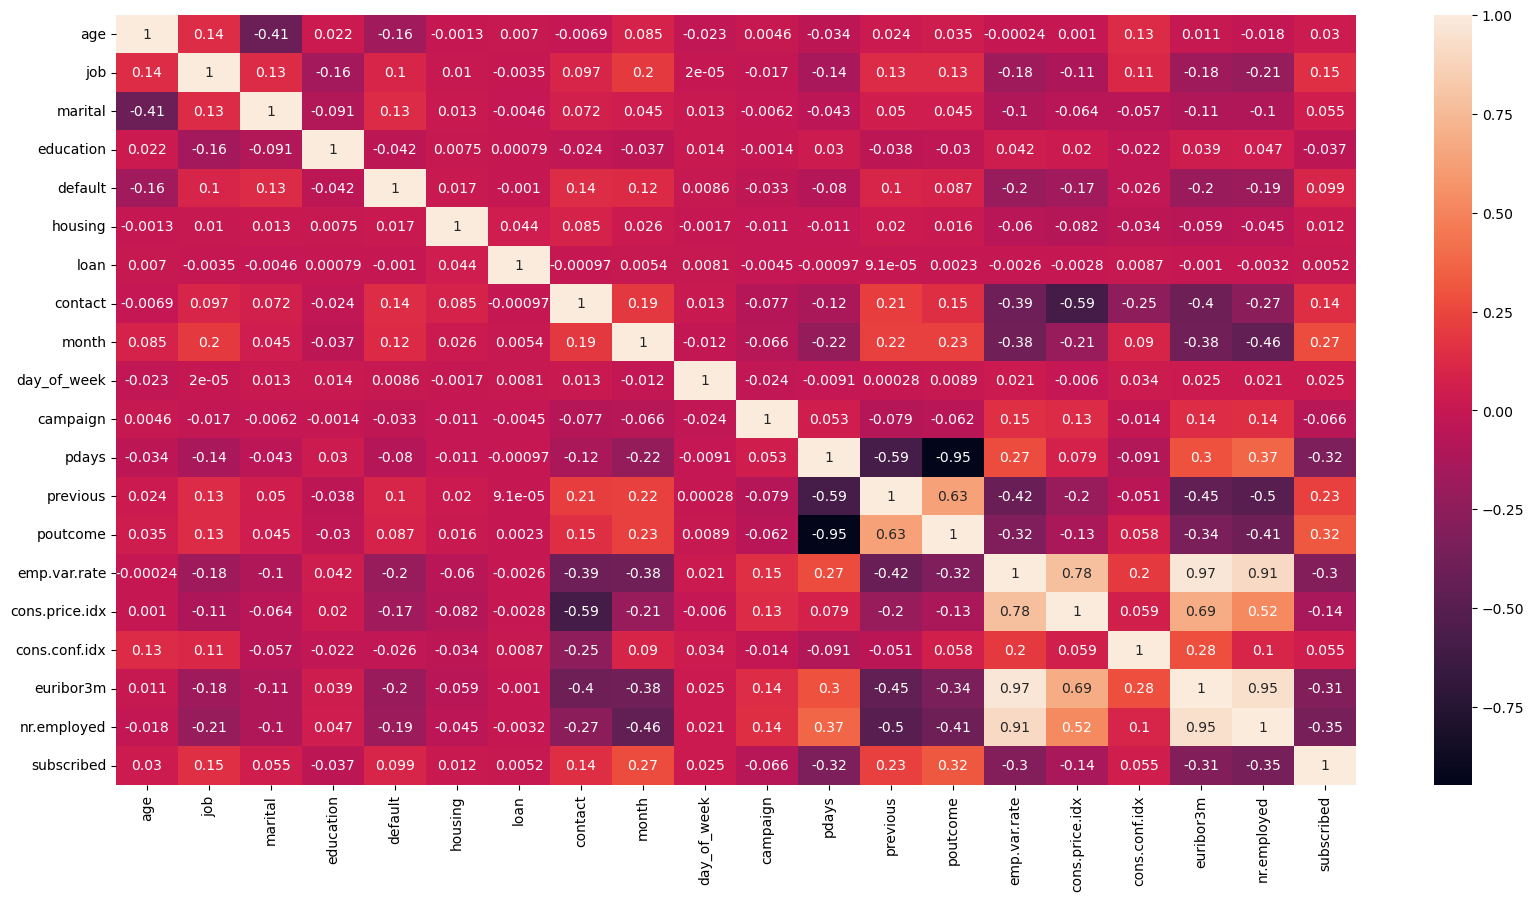

In [28]:
# Correlation of heat map against each feature
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(df.corr(), annot = True)

The subscribed feature is having a similar positive correlation 
- Between cons.conf.idx and martial and loan
- Between previous and month
- Between days_of_week and age
- Between contact and job

The subscribed feature is having a similar negative correlation 
- Between euribor3m and emp.var.rate
- Between nr.employed and pdays 

The subscribed feature is having a similar inverse correlation 
- Between poutcome and euribor3m
- Between poutcome and nr.employed
- Between poutcome and emp.var.rate

SequentialFeatureSelection is used to select the 9 features which represent these collinearity of the dataset and to avoid multicollinearity with each other

In [29]:
#SequentialFeatureSelection
selector = SequentialFeatureSelector(estimator = LogisticRegression(random_state = 42),
                               scoring = "accuracy",
                               cv = 5,
                               n_features_to_select = 9)

selector.fit(X, y)
selector.get_feature_names_out()

array(['age', 'job', 'marital', 'default', 'housing', 'campaign', 'pdays',
       'poutcome', 'nr.employed'], dtype=object)

In [30]:
# Creating a dataframe to use 9 Features for Model optimization
bank_df = df[['age', 'job', 'marital', 'default', 'housing', 'campaign', 'pdays',
       'poutcome', 'nr.employed','subscribed']]

In [31]:
bank_df.head()

,age,job,marital,default,housing,campaign,pdays,poutcome,nr.employed,subscribed
0,56,0.100000,0.101561,0.128803,0.108783,1,999,0.088324,5191.0,0
1,57,0.081422,0.101561,0.051536,0.108783,1,999,0.088324,5191.0,0
2,37,0.081422,0.101561,0.128803,0.116221,1,999,0.088324,5191.0,0
3,40,0.129667,0.101561,0.128803,0.108783,1,999,0.088324,5191.0,0
4,56,0.081422,0.101561,0.128803,0.108783,1,999,0.088324,5191.0,0


In [32]:
# Split the data to train and test
X = bank_df.drop("subscribed", axis = 1)
y = bank_df["subscribed"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [33]:
# Scaled the training data
scaler = StandardScaler()
# train data 
X_train_scaled = scaler.fit_transform(X_train)

# test data 
X_test_scaled = scaler.transform(X_test)

**Logisitic Regression**

In [34]:
#Logisitic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np

#Create Dictionary

max_iter=[10000]
c=[0.001,0.01,0.1,1,10]
penalty=['l1', 'l2']
params = dict(max_iter = max_iter, C = c, penalty = penalty)

# Used recall as scoring as missing out the potential subscribed customer will impact the business goal
grid_search_lgr = GridSearchCV(estimator = LogisticRegression(random_state=42)
                            ,param_grid = params
                           ,cv = 5
                           ,scoring ='recall')
grid_result_lgr = grid_search_lgr.fit(X_train_scaled, y_train)
print(grid_result_lgr.best_params_)
result_df =[]
mean_fit_time_lgr= grid_result_lgr.cv_results_['mean_fit_time']
mean_score_time_lgr= grid_result_lgr.cv_results_['mean_score_time']
n_splits_lgr  = grid_result_lgr.n_splits_ #number of splits of training data
n_iter_lgr = pd.DataFrame(grid_result_lgr.cv_results_).shape[0] #Iterations per split

grid_dt_time_lgr = np.mean(mean_fit_time_lgr + mean_score_time_lgr) * n_splits_lgr * n_iter_lgr

result_df.append(
        {
            'Model': 'Logistic Regression',
            'Train Time': grid_dt_time_lgr,
            'Train Accuracy': grid_result_lgr.best_estimator_.score(X_train_scaled, y_train),
            'Test Accuracy':  grid_result_lgr.best_estimator_.score(X_test_scaled, y_test)
            
        })
    
pd.DataFrame(result_df)


{'C': 0.1, 'max_iter': 10000, 'penalty': 'l2'}


,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.445112,0.899247,0.8963


**KNN Algorithm**

In [35]:
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
#Create Dictionary

knn__n_neighbors = list(range(1, 25, 2))
params = dict(n_neighbors = knn__n_neighbors)

grid_search_knn = GridSearchCV(estimator = KNeighborsClassifier() 
                           ,param_grid = params
                           ,cv = 5
                           ,scoring ='recall')
grid_result_knn = grid_search_knn.fit(X_train_scaled, y_train)
print(grid_result_knn.best_params_)

mean_fit_time_knn= grid_result_knn.cv_results_['mean_fit_time']
mean_score_time_knn= grid_result_knn.cv_results_['mean_score_time']
n_splits_knn  = grid_result_knn.n_splits_ #number of splits of training data
n_iter_knn = pd.DataFrame(grid_result_knn.cv_results_).shape[0] #Iterations per split

grid_dt_time_knn = np.mean(mean_fit_time_knn + mean_score_time_knn) * n_splits_knn * n_iter_knn

result_df.append(
        {
            'Model': 'KNN algorithm',
            'Train Time': grid_dt_time_knn,
            'Train Accuracy': grid_result_knn.best_estimator_.score(X_train_scaled, y_train.ravel()),
            'Test Accuracy':  grid_result_knn.best_estimator_.score(X_test_scaled, y_test.ravel())
        })
    
pd.DataFrame(result_df)



{'n_neighbors': 1}


,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.445112,0.899247,0.896300
1,KNN algorithm,9.997755,0.956909,0.841577


**Descision Tree**

In [36]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
params = {
          'criterion': ['gini','entropy'],
          'min_samples_leaf': range(1,10)
         }
grid_dt = GridSearchCV(estimator = DecisionTreeClassifier(random_state=42), param_grid=params)
grid_dt.fit(X_train_scaled,y_train)
print(grid_dt.best_params_)
mean_fit_time_dt= grid_dt.cv_results_['mean_fit_time']
mean_score_time_dt= grid_dt.cv_results_['mean_score_time']
n_splits_dt  = grid_dt.n_splits_ #number of splits of training data
n_iter_dt = pd.DataFrame(grid_dt.cv_results_).shape[0] #Iterations per split

grid_dt_time = np.mean(mean_fit_time_dt + mean_score_time_dt) * n_splits_dt * n_iter_dt

result_df.append(
        {
            'Model': 'Decision Tree',
            'Train Accuracy': grid_dt.best_estimator_.score(X_train_scaled, y_train),
            'Test Accuracy':  grid_dt.best_estimator_.score(X_test_scaled, y_test),
            'Train Time': grid_dt_time
            
        })
    
pd.DataFrame(result_df)

{'criterion': 'gini', 'min_samples_leaf': 9}


,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.445112,0.899247,0.896300
1,KNN algorithm,9.997755,0.956909,0.841577
2,Decision Tree,2.941299,0.909864,0.890958


**Support Vector Machines**

In [37]:
# SVC Model
from sklearn.svm import SVC
#Create Dictionary

kernel_range = ['linear', 'poly', 'rbf', 'sigmoid']
gamma =  [0.1, 1.0, 10.0, 100.0]
C_range = [0.001,0.01,0.1,1,10,100,1000]
degree_range = range(1, 5)
max_iter_range = [-1, 1, 2]

# putting it togther
grid = dict(kernel = kernel_range)

grid_search_svc = GridSearchCV(estimator = SVC(random_state=42) 
                           ,param_grid = grid
                           ,cv = 5
                           ,scoring ='recall')

# fit the model on train data
grid_result_svc = grid_search_svc.fit(X_train_scaled, y_train)

# summarize results
print(grid_result_svc.best_params_)

mean_fit_time_svc= grid_result_svc.cv_results_['mean_fit_time']
mean_score_time_svc= grid_result_svc.cv_results_['mean_score_time']
n_splits_svc  = grid_result_svc.n_splits_ #number of splits of training data
n_iter_svc = pd.DataFrame(grid_result_svc.cv_results_).shape[0] #Iterations per split

grid_time_svc = np.mean(mean_fit_time_svc + mean_score_time_svc) * n_splits_svc * n_iter_svc

result_df.append(
        {
            'Model': 'SVC',
            'Train Accuracy': grid_result_svc.best_estimator_.score(X_train_scaled, y_train),
            'Test Accuracy':  grid_result_svc.best_estimator_.score(X_test_scaled, y_test),
            'Train Time': grid_time_svc
            
        })
    
pd.DataFrame(result_df)

{'kernel': 'linear'}


,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.445112,0.899247,0.896300
1,KNN algorithm,9.997755,0.956909,0.841577
2,Decision Tree,2.941299,0.909864,0.890958
3,SVC,220.618433,0.898102,0.896139


Text(0.5, 1.0, 'SVM  Confusion Matrix')

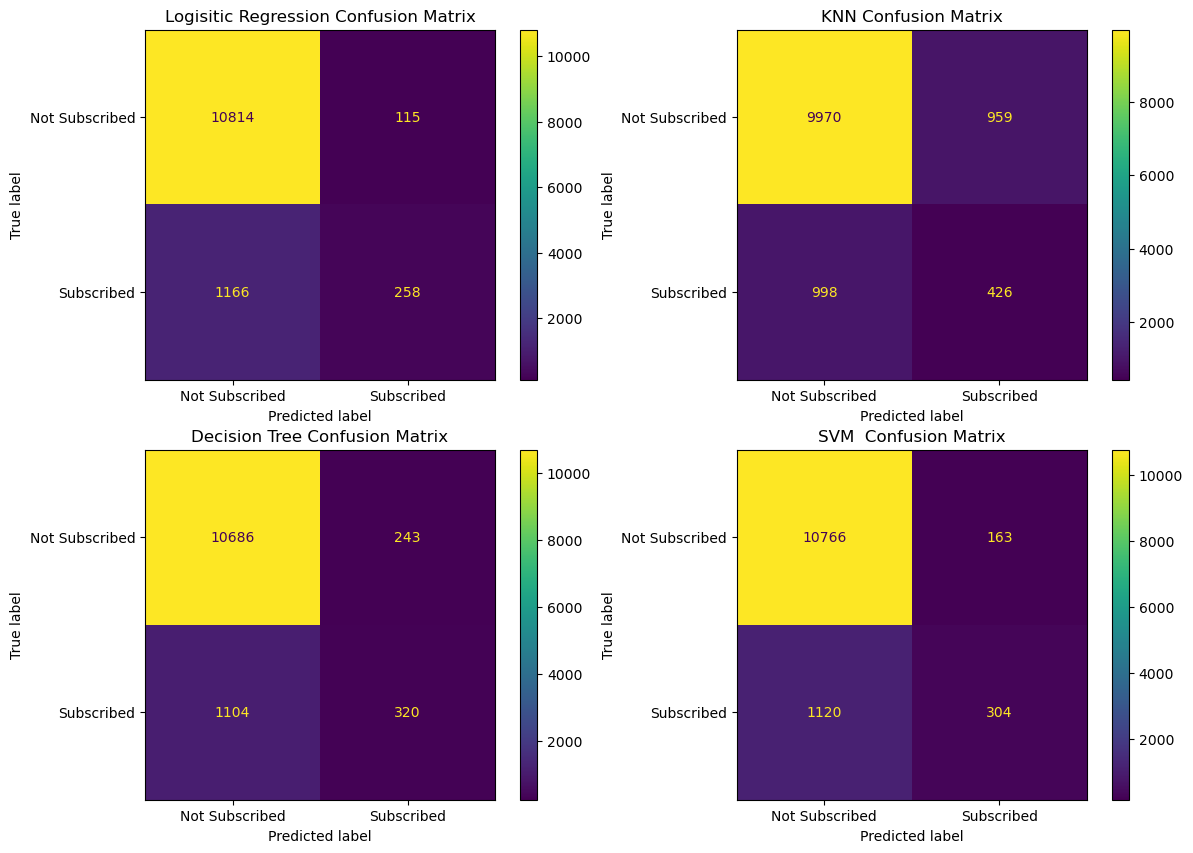

In [38]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay
from sklearn import set_config
fig, ax = plt.subplots(2, 2)
fig.set_size_inches(14, 10)

# Confusion Matrix of Logisitic Regression
conf_matrix = confusion_matrix(y_test, grid_result_lgr.best_estimator_.predict(X_test_scaled))
disp1 = ConfusionMatrixDisplay(conf_matrix, display_labels=['Not Subscribed', 'Subscribed'])
disp1.plot(ax=ax[0,0])
disp1.ax_.set_title('Logisitic Regression Confusion Matrix')

# Confusion Matrix of KNN
conf_matrix = confusion_matrix(y_test, grid_result_knn.best_estimator_.predict(X_test_scaled))
disp2 = ConfusionMatrixDisplay(conf_matrix, display_labels=['Not Subscribed', 'Subscribed'])
disp2.plot(ax=ax[0,1])
disp2.ax_.set_title('KNN Confusion Matrix')

# Confusion Matrix of Decision Tree
conf_matrix = confusion_matrix(y_test, grid_dt.best_estimator_.predict(X_test_scaled))
disp3 = ConfusionMatrixDisplay(conf_matrix, display_labels=['Not Subscribed', 'Subscribed'])
disp3.plot(ax=ax[1,0])
disp3.ax_.set_title('Decision Tree Confusion Matrix')

# Confusion Matrix of SVM
conf_matrix = confusion_matrix(y_test, grid_result_svc.best_estimator_.predict(X_test_scaled))
disp4 = ConfusionMatrixDisplay(conf_matrix, display_labels=['Not Subscribed', 'Subscribed'])
disp4.plot(ax=ax[1,1])
disp4.ax_.set_title('SVM  Confusion Matrix')


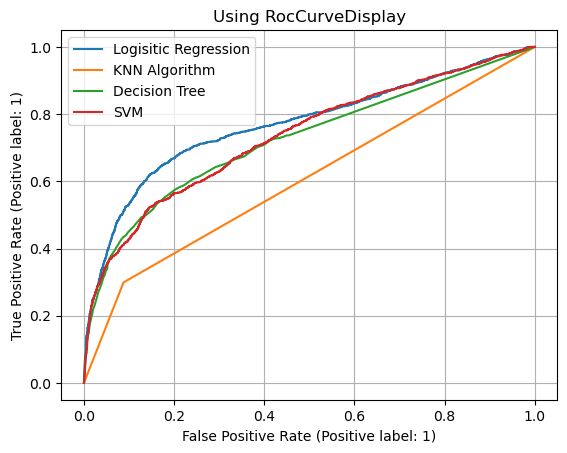

In [39]:
#ROC Curve 
fig, ax = plt.subplots()
RocCurveDisplay.from_estimator(grid_result_lgr.best_estimator_, X_test_scaled, y_test, pos_label = 1, ax = ax, label = 'Logisitic Regression')
RocCurveDisplay.from_estimator(grid_result_knn.best_estimator_, X_test_scaled, y_test, pos_label = 1, ax = ax, label = 'KNN Algorithm')
RocCurveDisplay.from_estimator(grid_dt.best_estimator_, X_test_scaled, y_test, pos_label = 1, ax = ax, label = 'Decision Tree')
RocCurveDisplay.from_estimator(grid_result_svc.best_estimator_, X_test_scaled, y_test, pos_label = 1, ax = ax, label = 'SVM')
plt.grid()
plt.title('Using RocCurveDisplay')
plt.legend();

### Evaluation

- The Model is tuned for hyperparameters based on the recall score.
- Used recall as scoring as missing out the potential subscribed customer will impact on the business goal
- Based on the Model Analysis the Logistic Regression, Decision Tree and SVC has better test score of 89 %
- The Training Time of the SVC is much higher compared to the Logistic Regression and Decision Tree
- The ROC Curve shows the logistic regression has a better trade-off between the Precision and Recall.
- Logistic Regression Classifier seems to be better for the given dataset in the case of the performance parameters.

**Permutation Importanace of Logisitic Regression Model**

In [40]:
# calculate the perumuation_importanace of the column for Logisitic Regression Model

from sklearn.inspection import permutation_importance
r = permutation_importance(grid_result_lgr.best_estimator_, X_test_scaled, y_test,
                          n_repeats=30,
                          random_state=42)

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{X.columns[i]:<21}"
            f"{r.importances_mean[i]:.3f}"
                f" +/- {r.importances_std[i]:.3f}")

pdays                0.011 +/- 0.000
nr.employed          0.010 +/- 0.001


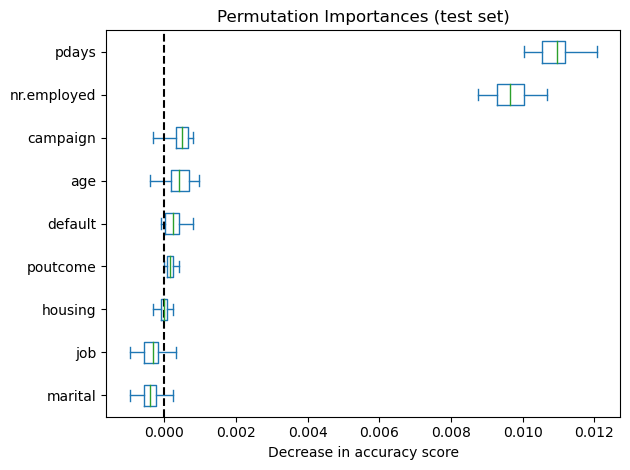

In [41]:
# Plot the Permutation Importance and feature accuracy
sorted_importances_idx = r.importances_mean.argsort()
importances = pd.DataFrame(
    r.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

- Based on the Logistic Regression the top four features that impacts the customer will subscribe to the deposit account or not are below
    - pdays
    - nr.employed
    - campaign
    - age


**pdays**
- The number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)


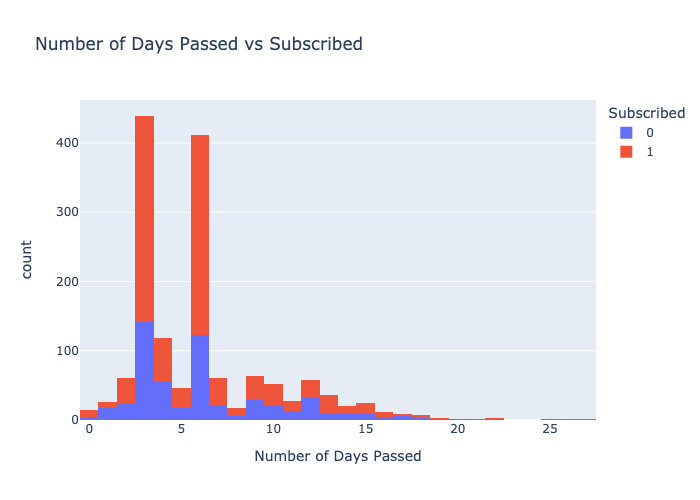

In [57]:

# Histplot of the Number of Days Passsed and Subscription
fig1 = px.histogram(bank[bank['pdays'] != 999], x = 'pdays', color = 'subscribed',
       title = 'Number of Days Passed vs Subscribed', 
       labels = {"pdays" : "Number of Days Passed", "subscribed" : "Subscribed"} )
fig1.show("png")

**Number of Employees**
- The number of employees

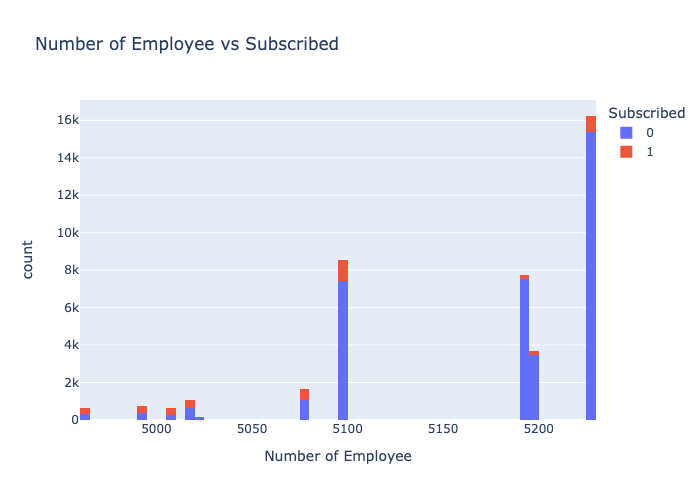

In [70]:
# Histplot of the Number of Employees and Subscription
fig2 = px.histogram(bank, x = 'nr.employed', color = 'subscribed',
       title = 'Number of Employee vs Subscribed', 
       labels = {"nr.employed" : "Number of Employee", "subscribed" : "Subscribed"} )
fig2.show("png")

**Campaign**
- The number of contacts performed during this campaign and for this client (numeric, includes last contact)

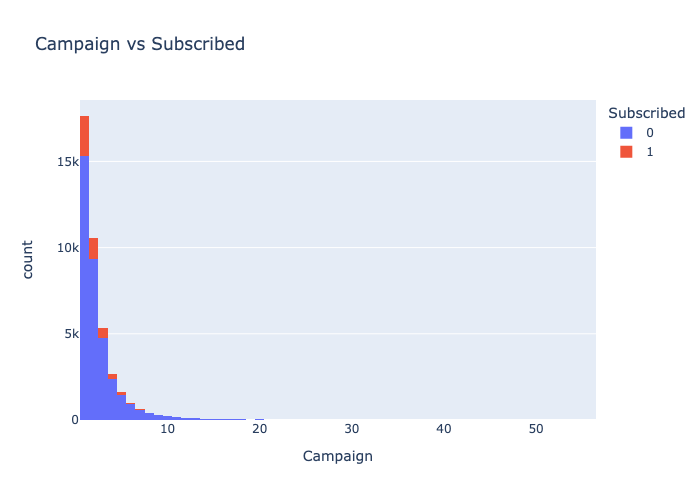

In [63]:
# Histplot of the Campaign and Subscription
fig3 = px.histogram(bank, x = 'campaign', color = 'subscribed',
       title = 'Campaign vs Subscribed', 
       labels = {"campaign" : "Campaign", "subscribed" : "Subscribed"} )
fig3.show("png")

**Age**
- The Age of the contact

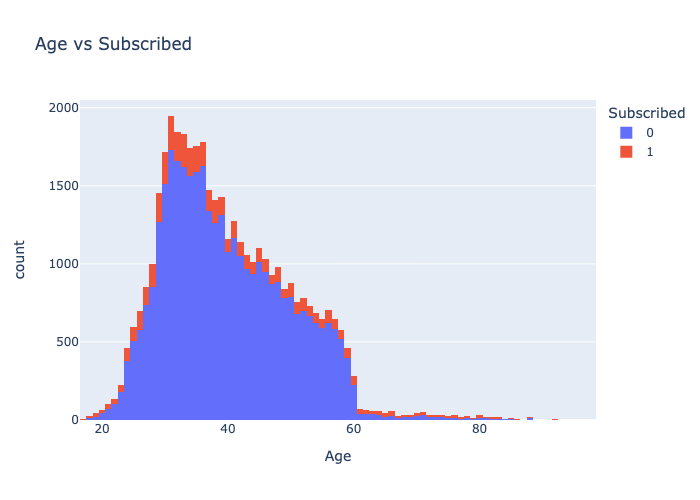

In [65]:
fig4 = px.histogram(bank, x = 'age', color = 'subscribed',
       title = 'Age vs Subscribed', 
       labels = {"age" : "Age", "subscribed" : "Subscribed"} )
fig4.show("png")

**Subscription**
- The Subscription Success Rate

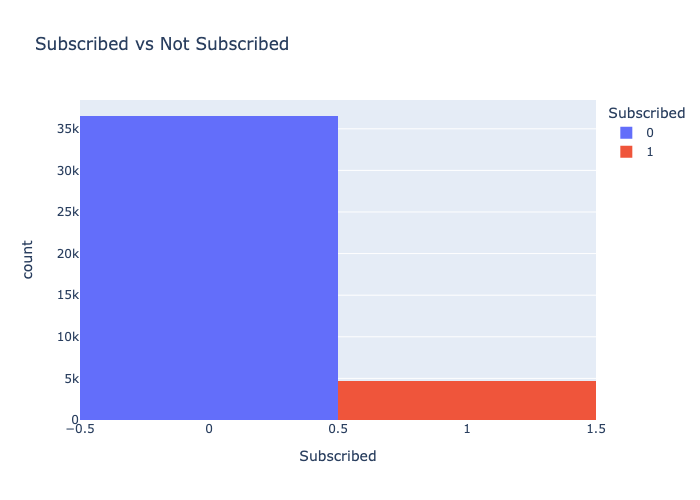

In [72]:
# The Total number of Subscribed vs not subscribed in the dataset
fig5 = px.histogram(bank, x = 'subscribed', color = 'subscribed',
       title = 'Subscribed vs Not Subscribed', 
       labels = {"subscribed" : "Subscribed"} )
fig5.show("png")

### Next Steps and Recommendations

The targeted marketing campaign can focus on below observations to have a high successful rate of subscription to the deposit.
- Making the contact again between 3 and 6 days after the last contact has a high success rate
- More Contact has been made for the number of employees > 5100 however the comparitieve success rate is higher for the < 5100 number of employees.
- Targeting the < 5100 number of employees is having a higher success rate.
- The Success is higher if the contact is done less than 5 times for the campaign. More number of contacts has less success rate of subscription
- The Age group of < 40 has high success rate.


##### Questions